In [1]:
import os
import numpy as np
import pandas as pd
COMMENT_PATH = 'Dataset/comments.csv'
TRANSCRIPT_FOLDER = "Dataset/Transcripts/"
INFO_PATH = "Dataset/videos.csv"
LOG_ERROR_PATH = "DataCollection/error_log.csv"
LOG_SUCCESS_PATH = "DataCollection/success_log.csv"

# 1. Clean empty file
* 清除没有comment / transcript的数据

In [2]:
comment_df = pd.read_csv(COMMENT_PATH)
info_df = pd.read_csv(INFO_PATH)

In [3]:
comment_df.describe()

,vid,uid,content,votes
count,481821,481821,481817,389255
unique,4229,236830,220950,1191
top,wlCz8nkDNqo,UgziUl3K5xK980NQ0bp4AaABAg,❤,1
freq,480,12,769,52884


In [4]:
comment_df.shape

(481821, 4)

In [5]:
comment_df = comment_df.drop_duplicates(['uid', 'content'])

In [6]:
cleaned_info_df = info_df[info_df['vid'].isin(comment_df['vid'])]
cleaned_info_df.shape

(4410, 7)

In [7]:
# transcript 有1800+个video是空的
empty_vids = set()
for file in os.listdir(TRANSCRIPT_FOLDER):
    if file == '.DS_Store':
        continue
    with open(os.path.join(TRANSCRIPT_FOLDER, file), 'r')as f:
        lines = f.readlines()
        if len(lines) <= 5:
            vid = file.split('.')[0]
            empty_vids.add(vid)

In [8]:
cleaned_info_df = cleaned_info_df[~info_df['vid'].isin(empty_vids)]


<ipython-input-8-8912f1cf3b77>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cleaned_info_df = cleaned_info_df[~info_df['vid'].isin(empty_vids)]


In [9]:
deleted_infos = info_df[~info_df['vid'].isin(cleaned_info_df['vid'])]
deleted_infos.shape

(2523, 7)

In [10]:
cleaned_info_df.shape

(2860, 7)

In [17]:
cleaned_info_df = cleaned_info_df.drop_duplicates(['vid'])
cleaned_info_df.shape

(2740, 7)

In [18]:

cleaned_info_df.to_csv('info.csv', index=None)

## 1.2 清理空数据之后的分类结果
1. News和Education 最多，都超过300了

In [19]:
deleted_infos['tag'].value_counts()

Education        376
News             372
Vlog             231
Music            221
Fashion          218
Art              194
Sport            176
Game             171
Entertainment    161
Tech             160
Food             127
Motivation       116
Name: tag, dtype: int64

<AxesSubplot:>

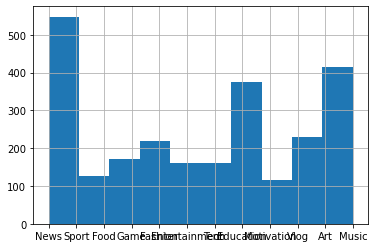

In [20]:
deleted_infos['tag'].hist()

# 2. Video Information Profile
* 每个属性的nan情况
* tag的分布
* 发布时间
* views需要处理成数据

 原来有5283个video

In [39]:
infos = pd.read_csv("info.csv")
infos.describe()

,vid,title,tag,time,duration,views,link
count,2740,2740,2740,2740,2740,2738,2740
unique,2740,2734,12,89,1481,2735,2740
top,gTxbZLo1Nng,Music Mix 2022 🎧 EDM Remixes of Popular Songs ...,Tech,1 month ago,1:00,"56,637 views",https://www.youtube.com/watch?v=01l6oFVdruc
freq,1,2,306,252,25,2,1


## 2.1 duration

In [35]:
infos['duration']

0       3:11
1       8:35
2       3:46
3       1:41
4       2:41
        ... 
2735    3:27
2736    4:57
2737    3:08
2738    2:32
2739    3:42
Name: duration, Length: 2740, dtype: object

In [40]:
def trans_duration(string):
    miniute, second = string.split(':')[-2], string.split(':')[-1]
    if len(string.split(':')) == 3:
        hour = string.split(':')[0]
    else:
        hour = 0
    return (int(hour)* 3600 + int(miniute)*60 + int(second))/60
infos['duration'] = infos['duration'].apply(trans_duration)
infos['duration'].describe()

count    2740.000000
mean       18.942701
std        35.841803
min         0.216667
25%         6.083333
50%        11.500000
75%        19.450000
max       801.566667
Name: duration, dtype: float64

In [44]:
infos = infos[infos['duration'] < 20]
infos.describe()

,duration
count,2086.000000
mean,9.254666
std,5.196186
min,0.216667
25%,4.583333
50%,9.116667
75%,13.262500
max,19.983333


## 2.2 views

In [58]:
infos.views

0          143,423 views
1        1,129,023 views
2           73,366 views
3          122,448 views
4          309,045 views
              ...       
2735         1,261 views
2736       806,112 views
2737    37,929,473 views
2738     1,095,318 views
2739       335,583 views
Name: views, Length: 2086, dtype: object

In [63]:
def trans_views(string):
    try:
        return int(string.strip('views').replace(',',''))/10000
    except:
        return 
infos['view_10k'] = infos['views'].apply(trans_views)

In [64]:
infos['view_10k']

0         14.3423
1        112.9023
2          7.3366
3         12.2448
4         30.9045
          ...    
2735       0.1261
2736      80.6112
2737    3792.9473
2738     109.5318
2739      33.5583
Name: view_10k, Length: 2086, dtype: float64

array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'view_10k'}>]], dtype=object)

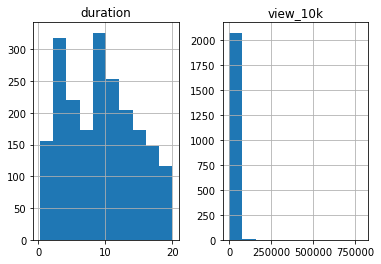

In [65]:
infos.hist()

In [66]:
infos.to_csv('new_infos.csv', index = None)